# Exploritory Data Analysis

### Data cleaning

In [1]:
import json
import pandas as pd
import re

In [2]:
# import 2018 goodreads books
with open("Goodreads_books_2018.json") as datafile:
    data_2018 = json.load(datafile)

In [3]:
# import 2017 goodreads books
with open("Goodreads_books_2017.json") as datafile:
    data_2017 = json.load(datafile)

#### Cleaing up goodreads book data

In [75]:
df_2018 = pd.DataFrame(data_2018)

In [76]:
df_2017 = pd.DataFrame(data_2017)

In [77]:
# join the dataframes
df_goodreads = pd.concat([df_2017,df_2018])

In [80]:
df_goodreads.reset_index(drop=True,inplace=True)

In [81]:
df_goodreads.shape

(2803, 10)

In [82]:
df_goodreads.index

RangeIndex(start=0, stop=2803, step=1)

In [83]:
df_goodreads = df_goodreads[['ISBN','title','series','author','rating','genre','publish_date','publish_company','format','number_of_pages']]

In [84]:
df_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 10 columns):
ISBN               2803 non-null object
title              2803 non-null object
series             2803 non-null object
author             2803 non-null object
rating             2803 non-null object
genre              2803 non-null object
publish_date       2803 non-null object
publish_company    2803 non-null object
format             2803 non-null object
number_of_pages    2803 non-null object
dtypes: object(10)
memory usage: 219.1+ KB


In [85]:
# get rid of rows where ISBN wasn't actually an ISBN
# use a reg ex variable declaring that the ISBN must be 13 digits
reg_ex = r'^(\d{13})$'

df_goodreads = df_goodreads[df_goodreads['ISBN'].str.contains(reg_ex)]

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


In [86]:
# make series column binary (0 if not part of a series, 1 if it is)
df_goodreads['series'].loc[(df_goodreads['series'] == "Edit Details")] = 0
df_goodreads['series'].loc[(df_goodreads['series'] != 0)] = 1

In [87]:
df_goodreads['rating'] = df_goodreads['rating'].astype(float)

In [88]:
# split up the date into month and year
df_goodreads['publish_month'] = df_goodreads['publish_date'].str.split(n=2,expand = True)[0]
df_goodreads['publish_year'] = df_goodreads['publish_date'].str.split(n=2,expand = True)[2]

In [89]:
# 1172 books from goodreads between 2017 and 2018 bc we dropped the empty ISBNs
df_goodreads.shape

(1172, 12)

In [90]:
# reset the index again
df_goodreads.reset_index(drop=True, inplace=True)

In [91]:
df_goodreads.index

RangeIndex(start=0, stop=1172, step=1)

In [92]:
# need to drop duplicates
df_goodreads[df_goodreads.duplicated(subset='ISBN') == True]

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year
927,9780062676788,The Word Is Murder,1,Anthony Horowitz,3.92,mystery,June 5th 2018,Harper (first published August 24th 2017),Hardcover,390,June,2018


In [93]:
df_goodreads[df_goodreads['ISBN'] == '9780062676788']

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year
545,9780062676788,The Word Is Murder,1,Anthony Horowitz,3.92,mystery,June 5th 2018,Harper (first published August 24th 2017),Hardcover,390,June,2018
927,9780062676788,The Word Is Murder,1,Anthony Horowitz,3.92,mystery,June 5th 2018,Harper (first published August 24th 2017),Hardcover,390,June,2018


In [94]:
# let's drop the second one
df_goodreads = df_goodreads.drop(index = 545)

In [95]:
# now there's only one!
df_goodreads[df_goodreads['ISBN'] == '9780062676788']

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year
927,9780062676788,The Word Is Murder,1,Anthony Horowitz,3.92,mystery,June 5th 2018,Harper (first published August 24th 2017),Hardcover,390,June,2018


#### Cleaning up NYT bestseller data

In [96]:
# import the NYT bestsellers
with open("list_of_NYT_books.json") as datafile:
    NYT_bestsellers = json.load(datafile)

In [216]:
df_NYT = pd.DataFrame(NYT_bestsellers)

In [217]:
# do everything to this dataframe that we did to the df above before merging

In [218]:
df_NYT = df_NYT[['ISBN','title','series','author','rating','genre','publish_date','publish_company','format','number_of_pages']]

In [219]:
# make series a binary value
df_NYT['series'].loc[(df_NYT['series'] == "Edit Details")] = 0
df_NYT['series'].loc[(df_NYT['series'] != 0)] = 1

In [220]:
# split up the date into month and year
df_NYT['publish_month'] = df_NYT['publish_date'].str.split(n=2,expand = True)[0]
df_NYT['publish_year'] = df_NYT['publish_date'].str.split(n=2,expand = True)[2]

In [221]:
# convert rating to a float
df_NYT['rating'] = df_NYT['rating'].astype(float)

In [222]:
# set ISBN as unique index value
# df_NYT.set_index('ISBN',inplace=True)

In [223]:
# create a column of 1's to represent that these are all bestsellers
df_NYT['NYT_bestseller'] = 1

In [224]:
len(df_NYT)

741

In [225]:
df_NYT = df_NYT.drop_duplicates()

In [226]:
len(df_NYT)

558

In [227]:
# df_NYT = df_NYT.loc[~df_NYT.index.duplicated(keep='first')]

#### Merge the dataframes and continue cleaning

In [349]:
full_df = pd.concat([df_NYT,df_goodreads], sort=False)

In [350]:
full_df.shape

(1729, 13)

In [351]:
# let's reset the index
full_df.reset_index(drop=True, inplace=True)

In [352]:
full_df.index

RangeIndex(start=0, stop=1729, step=1)

In [353]:
# fill in the non-bestsellers with 0 in that column
full_df['NYT_bestseller'].fillna(value=0,inplace=True)

##### Clean up date information

In [354]:
# look at dates that weren't coded properly
full_df[(full_df['publish_month'] != 'January') &
        (full_df['publish_month'] != 'February') &
        (full_df['publish_month'] != 'March') &
        (full_df['publish_month'] != 'April') &
        (full_df['publish_month'] != 'May') &
        (full_df['publish_month'] != 'June') &
        (full_df['publish_month'] != 'July') &
        (full_df['publish_month'] != 'August') &
        (full_df['publish_month'] != 'September') &
        (full_df['publish_month'] != 'October') &
        (full_df['publish_month'] != 'November') &
        (full_df['publish_month'] != 'December')]


,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
438,9780399592805,The Golden House,0,Salman Rushdie,3.66,fiction,2017,Random House,Hardcover,380,2017,None,1.0
1035,9781927990216,Prime Meridian,0,Silvia Moreno-Garcia,4.03,science-fiction,,Innsmouth Free Press (first published December...,Paperback,122,None,None,0.0
1381,9789381841372,Wedding Pickle,0,Neha Sharma,4.03,asian-literature,2018,Grapevine India,Paperback,264,2018,None,0.0
1597,9780300219333,Packing My Library: An Elegy and Ten Digressi...,0,Alberto Manguel,3.88,writing,2018,Yale University Press,Hardcover,146,2018,None,0.0
1692,9780062468741,The Iron Season,1,Helene Wecker,4.03,fantasy,Expected publication: 2020,Harper,ebook,448,Expected,2020,0.0


In [355]:
# manually fix these, except the last one which hasn't been published yet - let's drop that one
full_df['publish_month'].loc[full_df['ISBN'] == '9780399592805'] = 'September'
full_df['publish_month'].loc[full_df['ISBN'] == '9781927990216'] = 'July'
full_df['publish_month'].loc[full_df['ISBN'] == '9789381841372'] = 'January'
full_df['publish_month'].loc[full_df['ISBN'] == '9780300219333'] = 'March'
full_df = full_df.drop(index=1141)

In [356]:
# lets also fix the years
full_df['publish_year'].loc[full_df['ISBN'] == '9780399592805'] = '2017'
full_df['publish_year'].loc[full_df['ISBN'] == '9781927990216'] = '2018'
full_df['publish_year'].loc[full_df['ISBN'] == '9789381841372'] = '2018'
full_df['publish_year'].loc[full_df['ISBN'] == '9780300219333'] = '2018'

In [357]:
# lets do the same thing to check that the year was coded correctly but use regex since 
# so we don't have to manually write out all the years
reg_ex_year = r'^(\s*2[0-9]{3}\s*)$' 

full_df[full_df['publish_year'].str.contains(reg_ex_year) == False]

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
398,9780061122415,The Alchemist,0,Paulo Coelho,3.85,fiction,May 1st 1993,HarperCollins (first published 1988),Paperback,197,May,1993,1.0
880,9781520356686,Fire in His Blood,1,Ruby Dixon,3.82,fantasy,January 11th 2017(first published January 9th ...,,Paperback,331,January,2017(first published January 9th 2017),0.0
1126,9781946836038,Amnesia,1,Cambria Hebert,3.99,romance,June 13th 2017(first published June 10th 2017),,Paperback,408,June,2017(first published June 10th 2017),0.0


In [358]:
# manually change the last two (the first one is correct just written a long time ago!)
full_df['publish_year'].loc[full_df['ISBN'] == '9781520356686'] = '2017'
full_df['publish_year'].loc[full_df['ISBN'] == '9781946836038'] = '2017'

In [359]:
# all fixed!

full_df[full_df['publish_year'].str.contains(reg_ex_year) == False]

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
398,9780061122415,The Alchemist,0,Paulo Coelho,3.85,fiction,May 1st 1993,HarperCollins (first published 1988),Paperback,197,May,1993,1.0


##### Get rid of duplicates

In [360]:
# there are cases where some books are duplicated (58)- the one's shown below are from goodreads
# and are encoded as not best sellers, evne though they really are since they also appear
# in the NYT dataframe
len(full_df[full_df.duplicated(subset='ISBN') == True])

58

In [361]:
# make the duplicates a 1 in the NYT best seller column so they are TRULY the same rows
# that way we can use duplicated to drop them and the result will be one copy
full_df['NYT_bestseller'].loc[full_df.duplicated(subset='ISBN')==True] = 1

In [362]:
full_df=full_df.drop_duplicates()

In [363]:
full_df.shape

(1671, 13)

In [364]:
full_df.reset_index(drop=True, inplace=True)

In [365]:
full_df.index

RangeIndex(start=0, stop=1671, step=1)

##### Deal with missing values

In [366]:
# because of how we scraped, there are null values in the df currently coded as strings
import numpy as np
np.where(full_df.applymap(lambda x: x == ''))

(array([  60,  120,  133,  133,  292,  340,  440,  530,  546,  557,  585,
         632,  845,  860,  906,  909,  915,  932,  967,  969,  996, 1010,
        1010, 1010, 1024, 1040, 1063, 1076, 1077, 1083, 1094, 1302, 1365,
        1365, 1488, 1502, 1544, 1585, 1611, 1626]),
 array([9, 9, 5, 9, 9, 9, 8, 9, 9, 9, 7, 7, 7, 9, 9, 5, 5, 5, 7, 9, 6, 5,
        7, 9, 7, 9, 7, 7, 9, 9, 7, 7, 7, 9, 5, 9, 9, 9, 9, 5]))

In [367]:
# let's replace them with nan values 
full_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [368]:
# now they are gone
np.where(full_df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [369]:
# let's see the empty values now
full_df.isna().sum()

ISBN                0
title               0
series              0
author              0
rating              0
genre               7
publish_date        1
publish_company    11
format              1
number_of_pages    20
publish_month       0
publish_year        5
NYT_bestseller      0
dtype: int64

In [370]:
# deal with empty values
full_df[full_df['publish_date'].isna()]
# this is fine we manually fixed the month and year columns already

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
996,9781927990216,Prime Meridian,0,Silvia Moreno-Garcia,4.03,science-fiction,NaN,Innsmouth Free Press (first published December...,Paperback,122,July,2018,0.0


In [371]:
full_df[full_df['publish_year'].isna()]

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
26,9780061792663,American Gods,1,Neil Gaiman,4.11,fantasy,June 2001,HarperCollins e-books,ebook,541,June,None,1.0
436,9781594633669,The Girl on the Train,0,Paula Hawkins,3.91,fiction,April 2019,Riverhead Books (first published January 13th ...,Hardcover,336,April,None,1.0
690,9781760293512,Frogkisser!,0,Garth Nix,3.77,fantasy,March 2017,Allen & Unwin (first published February 28th 2...,Paperback,336,March,None,0.0
1002,9781612196015,Why I Am Not a Feminist: A Feminist Manifesto,0,Jessa Crispin,3.54,feminism,February 2017,Melville House,Paperback,151,February,None,0.0
1101,9781335014900,As I Am,1,A.M. Arthur,4.03,romance,March 2017,Carina Press (first published February 13th 2017),Paperback,368,March,None,0.0


In [372]:
# manually fix these

full_df['publish_year'].loc[full_df['ISBN'] == '9780061792663'] = '2001'
full_df['publish_year'].loc[full_df['ISBN'] == '9781594633669'] = '2019'
full_df['publish_year'].loc[full_df['ISBN'] == '9781760293512'] = '2017'
full_df['publish_year'].loc[full_df['ISBN'] == '9781612196015'] = '2017'
full_df['publish_year'].loc[full_df['ISBN'] == '9781335014900'] = '2017'

In [373]:
# let's drop these since genre is missing and the genre reflected in the rest of teh datafarme
# was taken from goodreads and based on peoples votes - genre is subjective (for our data)
full_df[full_df['genre'].isna()]

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
133,9781621576785,How to Achieve,0,Vince M Bertram,3.50,NaN,August 1st 2017,Regnery Publishing,Hardcover,NaN,August,2017,1.0
909,9781912551118,Walk Quiet Run Quick,0,Jacqueline Francis,2.50,NaN,March 3rd 2018,Conscious Dreams Publishing (first published 2...,Paperback,164,March,2018,0.0
915,9781522072942,The Hackers Code: The Great Prison Escape Pro...,0,A.K. Mars,4.67,NaN,August 13th 2017,A. K. MARS,Paperback,288,August,2017,0.0
932,9781978493162,"New Trump Order: Get In, Fit in or Step Aside",0,America Speaks,5.00,NaN,October 19th 2017,Createspace,Paperback,266,October,2017,0.0
1010,9781897913949,Incorruption,0,Jack McGinnigle,4.00,NaN,February 7th 2017,NaN,Paperback,NaN,February,2017,0.0
1488,9782021377613,Les vacances du petit Renard,0,Arthur Cahn,3.29,NaN,January 4th 2018,Le Seuil,Kindle Edition,192,January,2018,0.0
1626,9781725040304,Knitting in the City Coloring Book,1,Penny Reid,4.82,NaN,September 17th 2018,CreateSpace (first published September 11th 2018),Paperback,66,September,2018,0.0


In [374]:
full_df.dropna(subset=['genre'], inplace=True)

In [375]:
# they're gone!
full_df[full_df['genre'].isna()]

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller


##### Clean up publishing company data

In [376]:
# some of the rows have publish date information - let's get rid of it!
full_df['publish_company'] = full_df['publish_company'].apply(lambda x: str(x).split('(')[0])

In [377]:
# for the major 5 publishing houses, we want to collapse the subsidiares into one group
# ex. all penguin random house companies 
full_df['publish_company'].value_counts()

St. Martin's Press                       43
William Morrow                           30
Little, Brown and Company                26
G.P. Putnam's Sons                       22
Harper                                   21
Ballantine Books                         21
Gallery Books                            21
Atria Books                              21
Viking                                   21
Delacorte Press                          20
Flatiron Books                           20
Grand Central Publishing                 19
Little, Brown Books for Young Readers    18
Random House                             18
Avon                                     18
HarperTeen                               18
Knopf Publishing Group                   16
Houghton Mifflin Harcourt                15
Berkley                                  14
Minotaur Books                           14
Scribner                                 14
Simon & Schuster                         14
Balzer + Bray                   

In [409]:
# Penguin Random House
penguin_companies = ['Crown','Knopf','Random House','Penguin', 'Berkley','New American',"G.P. Putnam's",
                     'Ballantine', 'Viking','Delacorte Press', 'Doubleday']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:'Penguin Random House' 
                                                              if any(y in x for y in penguin_companies) else x)

In [411]:
# Harper Collins
harper_companies = ['Harper','Collins','William Morrow','Thomas Nelson','Harlequin','Avon',
                    'Balzer','Katherine Tegen','Ecco', 'Dey Street']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:'Harper Collins' 
                                                              if any(y in x for y in harper_companies) else x)

In [384]:
# SimonSchuster
ss_companies = ['Simon', 'Schuster', 'Gallery Books','Atria Books','Scribner']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:'Simon & Schuster' 
                                                              if any(y in x for y in ss_companies) else x)

In [413]:
# Macmillan

macmillan_companies = ["St. Martin's Press","Minotaur","Tor Books",'Farrar, Straus and Giroux',
                       'Macmillan', 'Flatiron Books', 'Feiwel']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:"Macmillan" 
                                                              if any(y in x for y in macmillan_companies) else x)


In [417]:
# Hachette Livre
hachette_companies = ['Grand Central','Hachette','FaithWords'
                      'Little Brown', 'Little, Brown', 'Orbit','Disney-Hyperion']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:"Hachette"
                                                              if any(y in x for y in hachette_companies) else x)

In [419]:
full_df

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
0,9781419726552,"F*ck, That's Delicious: An Annotated Guide to...",0,Action Bronson,4.17,food-and-drink,September 12th 2017,Harry N. Abrams,Hardcover,192,September,2017,1.0
1,9780982301821,10-Day Green Smoothie Cleanse: Lose Up to 15 ...,0,J.J. Smith,4.11,health,February 9th 2014,Adiva Publishing,Paperback,167,February,2014,1.0
2,9780316407076,15th Affair,1,James Patterson,4.09,mystery,May 2nd 2016,Hachette,Hardcover,351,May,2016,1.0
3,9780718088804,42 Faith: The Rest of the Jackie Robinson Story,0,Ed Henry,4.16,biography,April 4th 2017,Harper Collins,Hardcover,368,April,2017,1.0
4,9780451495426,7 Lessons from Heaven: How Dying Taught Me to...,0,Mary C. Neal,4.08,non-fiction,September 19th 2017,Convergent Books,Paperback,288,September,2017,1.0
5,9780393254228,A Colony in a Nation,0,Chris Hayes,4.21,politics,March 21st 2017,W. W. NortonCompany,Hardcover,256,March,2017,1.0
6,9780761185734,A Field Guide to Redheads: An Illustrated Cel...,0,Elizabeth Graeber,3.52,humor,September 6th 2016,Workman Publishing Company,Hardcover,160,September,2016,1.0
7,9780735225114,A Legacy of Spies,1,John le Carré,3.90,fiction,September 5th 2017,Penguin Random House,Hardcover,264,September,2017,1.0
8,9781250085948,A Life Well Played: My Stories,0,Arnold Palmer,4.10,sports-and-games,October 4th 2016,Macmillan,Hardcover,272,October,2016,1.0
9,9780547577319,A Long Walk to Water: Based on a True Story,0,Linda Sue Park,4.25,historical,October 4th 2011,Clarion Books,Paperback,128,October,2011,1.0


In [418]:
full_df['publish_company'].value_counts()

Penguin Random House                            269
Harper Collins                                  218
Macmillan                                       127
Simon & Schuster                                120
Hachette                                        117
Houghton Mifflin Harcourt                        15
nan                                              10
Harry N. Abrams                                   9
Andrews McMeel Publishing                         9
W. W. NortonCompany                               8
Riverhead Books                                   8
Dutton                                            8
Wednesday Books                                   7
Image Comics                                      7
Lake Union Publishing                             6
Razorbill                                         6
Hqn                                               6
Algonquin Books                                   6
Swerve                                            6
Dial Books  

### Data exploration

In [267]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

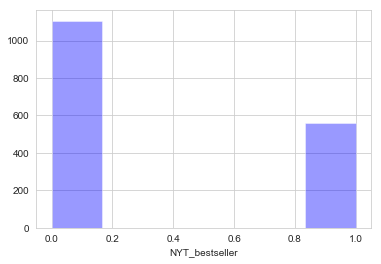

In [453]:
sns.set_style("whitegrid")
dist = sns.distplot(full_df.NYT_bestseller, kde=False,color='b')
plt.show(dist)

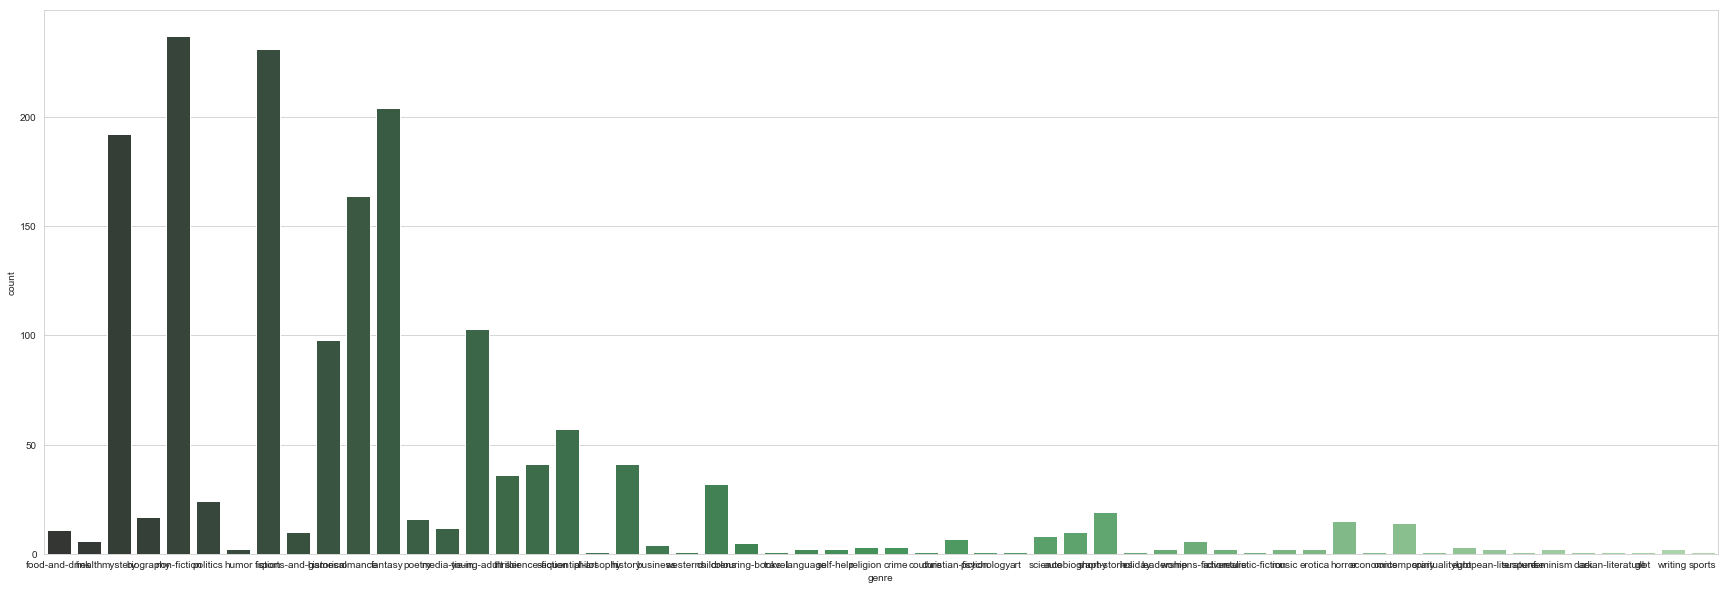

In [463]:
fig = plt.subplots(figsize=(30,10)) 
counts = sns.countplot(x="genre", data=full_df,palette="Greens_d")
plt.show(counts)

In [ ]:
full_df['publish_company']

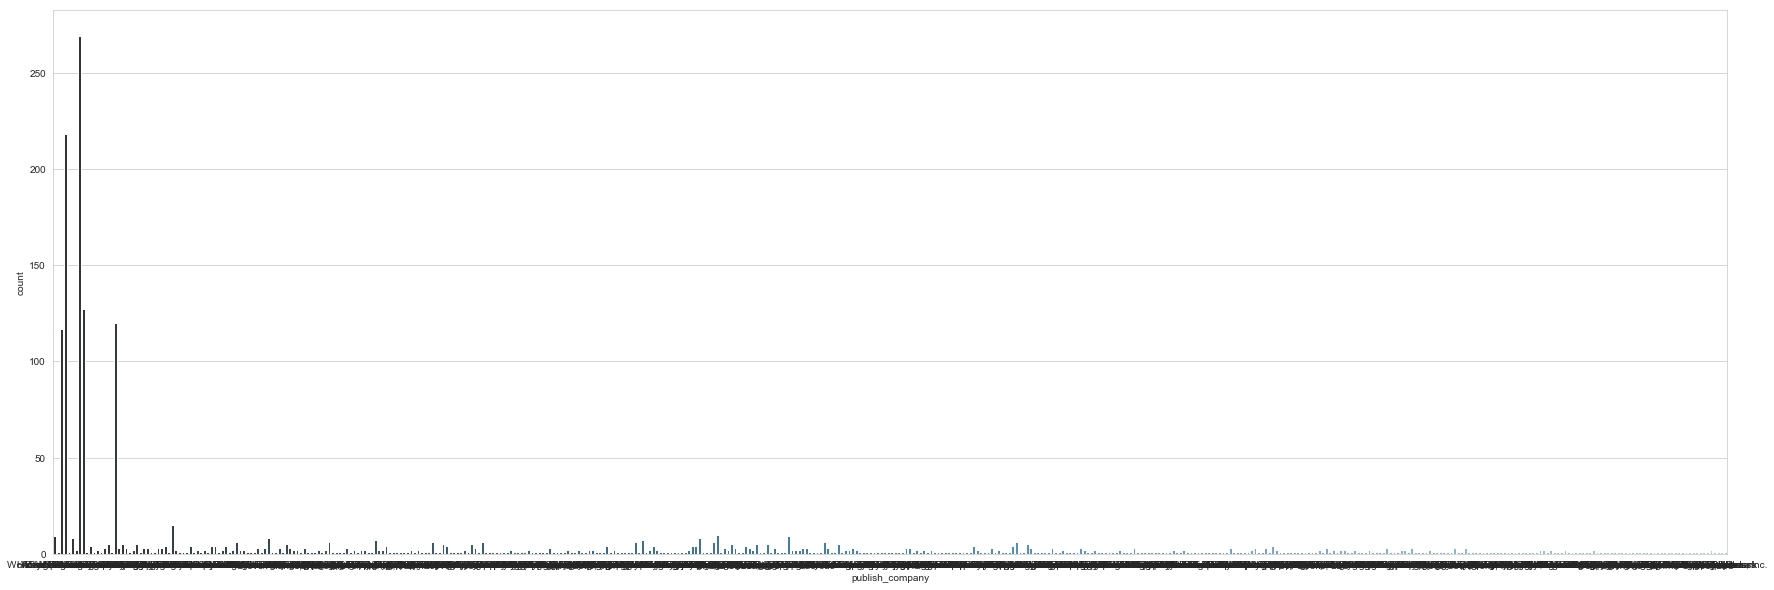

In [470]:
fig = plt.subplots(figsize=(30,10)) 
counts = sns.countplot(x="publish_company", data=full_df,palette="Blues_d")
plt.show(counts)

In [437]:
pd.crosstab(full_df.genre, full_df.NYT_bestseller)

NYT_bestseller,0.0,1.0
genre,,
adventure,0,2
art,0,1
asian-literature,1,0
autobiography,5,5
biography,4,13
business,0,4
childrens,12,20
christian-fiction,6,1
colouring-books,0,5


### Feature engineering

#### Titles

In [319]:
# the titles have extra spaces - let's get rid of them!
full_df['title'] = [x.strip() for x in full_df['title']]

In [246]:
# create new feature for number of characters in a title
full_df['length_of_title'] = [len(x) for x in full_df['title']]

In [247]:
# create new feature for number of words in a title
full_df['num_words_in_title'] = [len(x.split()) for x in full_df['title']]

#### Authors

In [ ]:
# new feature for top authors - based on forbes from 2017, 2018, 2019

In [503]:
top_10_2017 = ['J. K. Rowling', 'James Patterson', 'Jeff Kinney', 'Dan Brown','Stephen King',
'Nora Roberts','John Grisham','Paula Hawkins', 'E.L. James ','Danielle Steel', 'Rick Riordan']

In [504]:
top_10_2018 = ['E.L. James', 'Rick Riordan', 'Nora Roberts','Danielle Steel', 'Michael Wolff',
               'Dan Brown', 'Jeff Kinney','John Grisham','Stephen King','J.K. Rowling','James Patterson']

In [505]:
top_authors = top_10_2017+top_10_2018

In [506]:
# create nans
full_df['top_authors'] = np.nan

In [507]:
full_df['top_authors'] = full_df['author'].apply(lambda x: 1 if any(y in x for y in top_authors) else 0)

In [514]:
full_df.to_csv('final_dataframe.csv')